In [1]:
from accelerator import Lattice
from accelerator.elements import Drift, Quadrupole
from accelerator import Beam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = Drift(1)

In [3]:
lat = Lattice([d])

In [4]:
u, u_prime, s = lat.transport([1, 1])

(2,)


In [5]:
u

array([1., 2.])

In [6]:
u_prime

array([1., 1.])

In [7]:
b, a, g, s = lat.transport([1, 0, 1])

(3,)


In [8]:
b

array([1., 2.])

In [9]:
a

array([ 0., -1.])

In [10]:
s

array([0, 1])

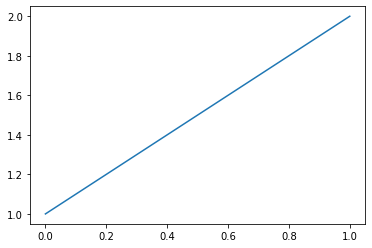

In [11]:
plt.plot(s, u)

In [12]:
beam = Beam()

In [13]:
u, u_prime = beam.phasespace([1,0,1])

In [14]:
u.shape

(1000,)

In [15]:
u_prime.shape

(1000,)

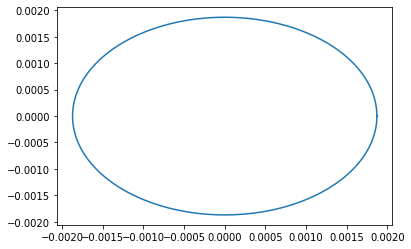

In [16]:
plt.plot(u, u_prime)

In [17]:
beam.phasespace([1,0,1])[0].T.shape

(1000,)

In [18]:
u, u_prime, s = lat.transport(beam.phasespace([1,0,1]))

(2, 1000)


In [19]:
u.shape

(1000, 2)

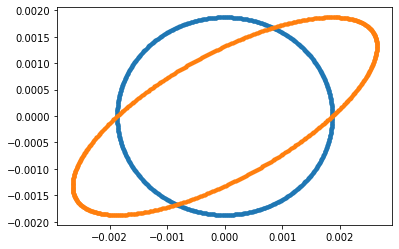

In [20]:
plt.plot(u, u_prime, linewidth=0, marker='.')

In [21]:
beam = Beam()

In [22]:
f = 0.8  # focal length (m)
L = 1.  # drift length (m). Note FODO total length: 2L

half_quad_F = Quadrupole(2.*f)
quad_D = Quadrupole(-f)
drift = Drift(L)

In [23]:
FODO = Lattice([half_quad_F, drift, quad_D, drift, half_quad_F])

In [24]:
ellipse = beam.phasespace(FODO.m_h.twiss.invariant)

In [25]:
u, u_prime, s = FODO.transport(ellipse)

(2, 1000)


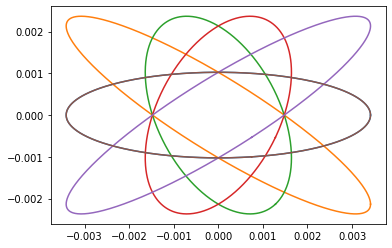

In [26]:
plt.plot(u, u_prime)

In [27]:
FODO.transport([*FODO.m_h.twiss.invariant])

(3,)


(array([3.3306656 , 3.3306656 , 0.76861514, 0.76861514, 3.3306656 ,
        3.3306656 ]),
 array([ 1.11528141e-16,  2.08166600e+00,  4.80384461e-01, -4.80384461e-01,
        -2.08166600e+00, -4.44089210e-16]),
 array([0.30024029, 1.60128154, 1.60128154, 1.60128154, 1.60128154,
        0.30024029]),
 array([0., 0., 1., 1., 2., 2.]))

In [30]:
beta, alpha, gamma, s = FODO.slice(Drift, 20).transport(FODO.m_h.twiss.invariant)

(3,)


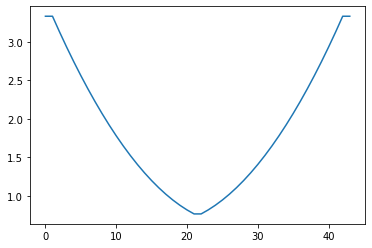

In [31]:
plt.plot(beta)